<a href="https://colab.research.google.com/github/Janina712/PUS2024_JBoecher/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import pylab as plt
import statistics
import warnings
warnings.filterwarnings("ignore")

**Summary:** Roth et al. (2019) seek to evaluate the usefulness of open data sources to identify energy-inefficient buildings in cities as compared to the Commercial Building Energy Consumption Survey (CBECS), which is currently used for this purpose. Specifically, they compare the performance of random forest and lasso regression models trained on open data and CBECS, respectively. Finally, this paper aims to identify which variables are important for modeling total energy consumption from open source data and should thus be collected by all cities in an attempt to optimize and standardize energy benchmarking.This investigation concludes that open source data is more suitable for energy benchmarking than relying on the traditional CBECS-driven approach. Building area, property type, conditioned area, and water usage are determined to be the most important variables in predicting energy consumption buildings. Roth et al. (2019) suggest that the goal for policy makers should be to rely on these measures to perform energy benchmarking.

# **City 1: Washington D.C.**

**Read the data and inspect the dataframe:**

In [109]:
dc = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/refs/heads/master/DC/2016%20Energy%20and%20Water%20Performance%20Benchmarking%20Results%20as%20of%2009-07-2017.csv")

In [110]:
print("there are (rows, columns) = ", (dc.shape), "in the D.C. dataframe")

there are (rows, columns) =  (2181, 36) in the D.C. dataframe


In [111]:
dc.describe()

,pm_pid,ward,year_built,tax_record_floor_area,reported_gross_floor_area,energy_star_score,total_ghg_emissions,total_ghg_emissions_intensity,water_use,electricity_use,natural_gas_use,fuel_use,district_water_use,latitude,longitude
count,1.574000e+03,1844.000000,2153.000000,2.181000e+03,1.521000e+03,1209.000000,1519.000000,1519.000000,1.311000e+03,1.482000e+03,1.087000e+03,6.600000e+01,1.700000e+01,1954.000000,1954.000000
mean,3.477316e+06,3.387202,1933.421273,2.009089e+05,1.876181e+05,61.207610,1397.998947,7.221922,5.582172e+04,3.041003e+06,6.745484e+04,1.133411e+06,-1.261140e+07,38.908558,-77.025736
std,1.151670e+06,1.996951,223.684123,2.447139e+05,2.431177e+05,27.486072,2790.536339,6.886701,6.498499e+05,6.584801e+06,2.975285e+05,2.171472e+06,9.224563e+07,0.025003,0.031201
min,2.214000e+03,1.000000,0.000000,9.171000e+03,5.982000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.097600e+03,-3.685268e+08,38.813539,-77.107478
25%,3.300369e+06,2.000000,1942.000000,7.044300e+04,6.960000e+04,42.000000,390.300000,4.800000,2.114100e+03,7.495754e+05,1.115681e+04,2.461230e+04,7.908049e+05,38.898739,-77.044005
50%,3.617946e+06,2.000000,1969.000000,1.213110e+05,1.194700e+05,69.000000,755.400000,6.300000,4.160100e+03,1.656484e+06,2.791756e+04,1.952242e+05,5.512830e+06,38.905369,-77.031106
75%,4.066820e+06,5.000000,1997.000000,2.488440e+05,2.332170e+05,84.000000,1565.150000,7.900000,7.286700e+03,3.491451e+06,5.286096e+04,1.371327e+06,1.457592e+07,38.922848,-77.009371
max,5.939893e+06,8.000000,2017.000000,3.997572e+06,5.634890e+06,100.000000,64992.500000,134.400000,1.929391e+07,1.661020e+08,7.269109e+06,1.275372e+07,3.101497e+07,38.984554,-76.914972


# **1. Clean the data:**

In [112]:
# convert "Not Available to nan"
dc.replace('Not Available', np.nan, inplace=True)

In [113]:
# drop columns with > 40% missing data
for c in dc.columns:

  # count number of rows with missing values
  n_miss = dc[c].isnull().sum()
  perc = n_miss / dc.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, dc[c].dtype,
                                                  n_miss, perc))
  if perc > 40:
    dc.drop(c, axis=1, inplace=True)

print("\n\nthere are (rows, columns) = ", (dc.shape), "in the DC dataframe")

pid (object):  Missing: 0 (0.0%)
dc_real_pid (object):  Missing: 267 (12.2%)
pm_pid (float64):  Missing: 607 (27.8%)
property_name (object):  Missing: 660 (30.3%)
pm_parent_pid (object):  Missing: 660 (30.3%)
parent_property_name (object):  Missing: 660 (30.3%)
year_ending (object):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
address_of_record (object):  Missing: 0 (0.0%)
owner_of_record (object):  Missing: 0 (0.0%)
ward (float64):  Missing: 337 (15.5%)
reported_address (object):  Missing: 660 (30.3%)
city (object):  Missing: 0 (0.0%)
state (object):  Missing: 0 (0.0%)
postal_code (object):  Missing: 607 (27.8%)
year_built (float64):  Missing: 28 (1.3%)
primary_ptype_self (object):  Missing: 660 (30.3%)
primary_ptype_epa (object):  Missing: 660 (30.3%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 660 (30.3%)
energy_star_score (float64):  Missing: 972 (44.6%)
site_eui (object):  Missing: 675 (30.9%)
weather_norm_sit

In [114]:
# remove irrelevant variables
print("Original:")
print(dc.columns)
print(dc.shape)
dc.drop(["pid","dc_real_pid","pm_pid",'pm_parent_pid', "property_name","parent_property_name", 'address_of_record', 'owner_of_record', 'reported_address',
       'city', 'state', 'postal_code','year_built'], axis=1, inplace=True)
print("\n\nNew:")
print(dc.columns)
print(dc.shape)

Original:
Index(['pid', 'dc_real_pid', 'pm_pid', 'property_name', 'pm_parent_pid',
       'parent_property_name', 'year_ending', 'report_status',
       'address_of_record', 'owner_of_record', 'ward', 'reported_address',
       'city', 'state', 'postal_code', 'year_built', 'primary_ptype_self',
       'primary_ptype_epa', 'tax_record_floor_area',
       'reported_gross_floor_area', 'site_eui', 'weather_norm_site_eui',
       'source_eui', 'weather_norm_source_eui', 'total_ghg_emissions',
       'total_ghg_emissions_intensity', 'water_use', 'electricity_use',
       'metered_areas_energy', 'latitude', 'longitude'],
      dtype='object')
(2181, 31)


New:
Index(['year_ending', 'report_status', 'ward', 'primary_ptype_self',
       'primary_ptype_epa', 'tax_record_floor_area',
       'reported_gross_floor_area', 'site_eui', 'weather_norm_site_eui',
       'source_eui', 'weather_norm_source_eui', 'total_ghg_emissions',
       'total_ghg_emissions_intensity', 'water_use', 'electricity_use',


# **2. Transform Input Features**

In [115]:
dc.describe()

,ward,tax_record_floor_area,reported_gross_floor_area,total_ghg_emissions,total_ghg_emissions_intensity,water_use,electricity_use,latitude,longitude
count,1844.000000,2.181000e+03,1.521000e+03,1519.000000,1519.000000,1.311000e+03,1.482000e+03,1954.000000,1954.000000
mean,3.387202,2.009089e+05,1.876181e+05,1397.998947,7.221922,5.582172e+04,3.041003e+06,38.908558,-77.025736
std,1.996951,2.447139e+05,2.431177e+05,2790.536339,6.886701,6.498499e+05,6.584801e+06,0.025003,0.031201
min,1.000000,9.171000e+03,5.982000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,38.813539,-77.107478
25%,2.000000,7.044300e+04,6.960000e+04,390.300000,4.800000,2.114100e+03,7.495754e+05,38.898739,-77.044005
50%,2.000000,1.213110e+05,1.194700e+05,755.400000,6.300000,4.160100e+03,1.656484e+06,38.905369,-77.031106
75%,5.000000,2.488440e+05,2.332170e+05,1565.150000,7.900000,7.286700e+03,3.491451e+06,38.922848,-77.009371
max,8.000000,3.997572e+06,5.634890e+06,64992.500000,134.400000,1.929391e+07,1.661020e+08,38.984554,-76.914972


What should you look at in the result?

This results dataframe provides an overview of the data. Given that variables were dropped in the previous step, I check if those variables are indeed no longer present in the dataframe (e.g., address_of_record). Describe() provides measures of central tendency, which allow me to learn about the variable distributions, for example, by comparing mean to median (total_ghg_emissions looks skewed to the left) and detect crazy outliers (75% vs. max and 25% vs. min; total_ghg_emissions and total_ghg_emissions-intensity may have outliers).


In [116]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year_ending                    2181 non-null   object 
 1   report_status                  2181 non-null   object 
 2   ward                           1844 non-null   float64
 3   primary_ptype_self             1521 non-null   object 
 4   primary_ptype_epa              1521 non-null   object 
 5   tax_record_floor_area          2181 non-null   float64
 6   reported_gross_floor_area      1521 non-null   float64
 7   site_eui                       1506 non-null   object 
 8   weather_norm_site_eui          1444 non-null   object 
 9   source_eui                     1506 non-null   object 
 10  weather_norm_source_eui        1444 non-null   object 
 11  total_ghg_emissions            1519 non-null   float64
 12  total_ghg_emissions_intensity  1519 non-null   f

Why is this helpful to print?

The info results dataframe lists the type of the variables allowing me to see which ones are categorical vs. numeric, which is relevant for the next step. Also, this output tells me how many non-null values I have for each column and the total number of rows. This allows me to identify variables that may have a lot of missing data (e.g., 'ward' in this dataset).

**2.1. Endogenous Variable**

In [117]:
# remove rows with missing site EUI (Energy Use Intensity) and reported_gross_floor_area
original_len = dc.shape[0]
dc.dropna(subset=['site_eui'], inplace=True)
dc.dropna(subset=['reported_gross_floor_area'], inplace=True)
print("I lost {:.2f}% of the data".format((1 - (dc.shape[0] / original_len)) * 100))

I lost 30.95% of the data


In [118]:
# check
dc["site_eui"].isna().sum()

0

In [119]:
# check
dc["reported_gross_floor_area"].isna().sum()

0

In [120]:
# compute total building energy use and convert to log space
dc["total_energy"] = np.log10(dc['site_eui'].astype(float) * dc['reported_gross_floor_area'])

In [121]:
# drop infinite
dc["total_energy"].replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(dc["total_energy"])).sum().sum()) # should be zero
dc.dropna(subset=["total_energy"], how="all", inplace=True)

number of infinite values: 0


In [122]:
# separate X and Y (site_eui)
dc_y = pd.DataFrame(dc['total_energy'].values,columns=['total_energy'])
dc_x = dc.drop(['total_energy', 'site_eui', 'reported_gross_floor_area'], axis =1) # drop target variable and variables used to compute it

**2.2. Exogenous Variables: Numerical**

In [123]:
# select numerical variables
X_dc_numeric_data = dc_x.select_dtypes(include=[np.number])

In [124]:
X_dc_numeric_data.shape

(1499, 8)

In [125]:
X_dc_numeric_data.head()

,ward,tax_record_floor_area,total_ghg_emissions,total_ghg_emissions_intensity,water_use,electricity_use,latitude,longitude
0,4.0,63227.0,482.9,7.4,6963.5,633043.8,38.963597,-77.033848
1,2.0,251557.0,2164.4,8.4,8490.0,5531486.0,38.897849,-77.029872
2,2.0,330550.0,1852.2,8.3,8749.1,3863003.0,38.904056,-77.037973
3,2.0,256839.0,1249.2,5.9,5393.8,2936445.0,38.902189,-77.041238
4,2.0,370000.0,2874.1,7.5,10422.6,7345290.0,38.904376,-77.046882


is there anything suspicious? anything thas is in fact **not** a numerical variable? that will depend on how you did in TASK 1

I noticed here that year_built was a numerical variable in my dataset, which I think should be dropped (because it is ordinal and necessarily within a certain range). Year_built could probably have an effect though in that older buildings are generally less efficient than newer buildings. The year could maybe be turned into a categorical variable (e.g., pre-70s, 80s-90, 2000s, since 2020 or something that makes more sense from a domain perspective). I dropped this variable for the current analysis.

**2.2.1. Collinearity**

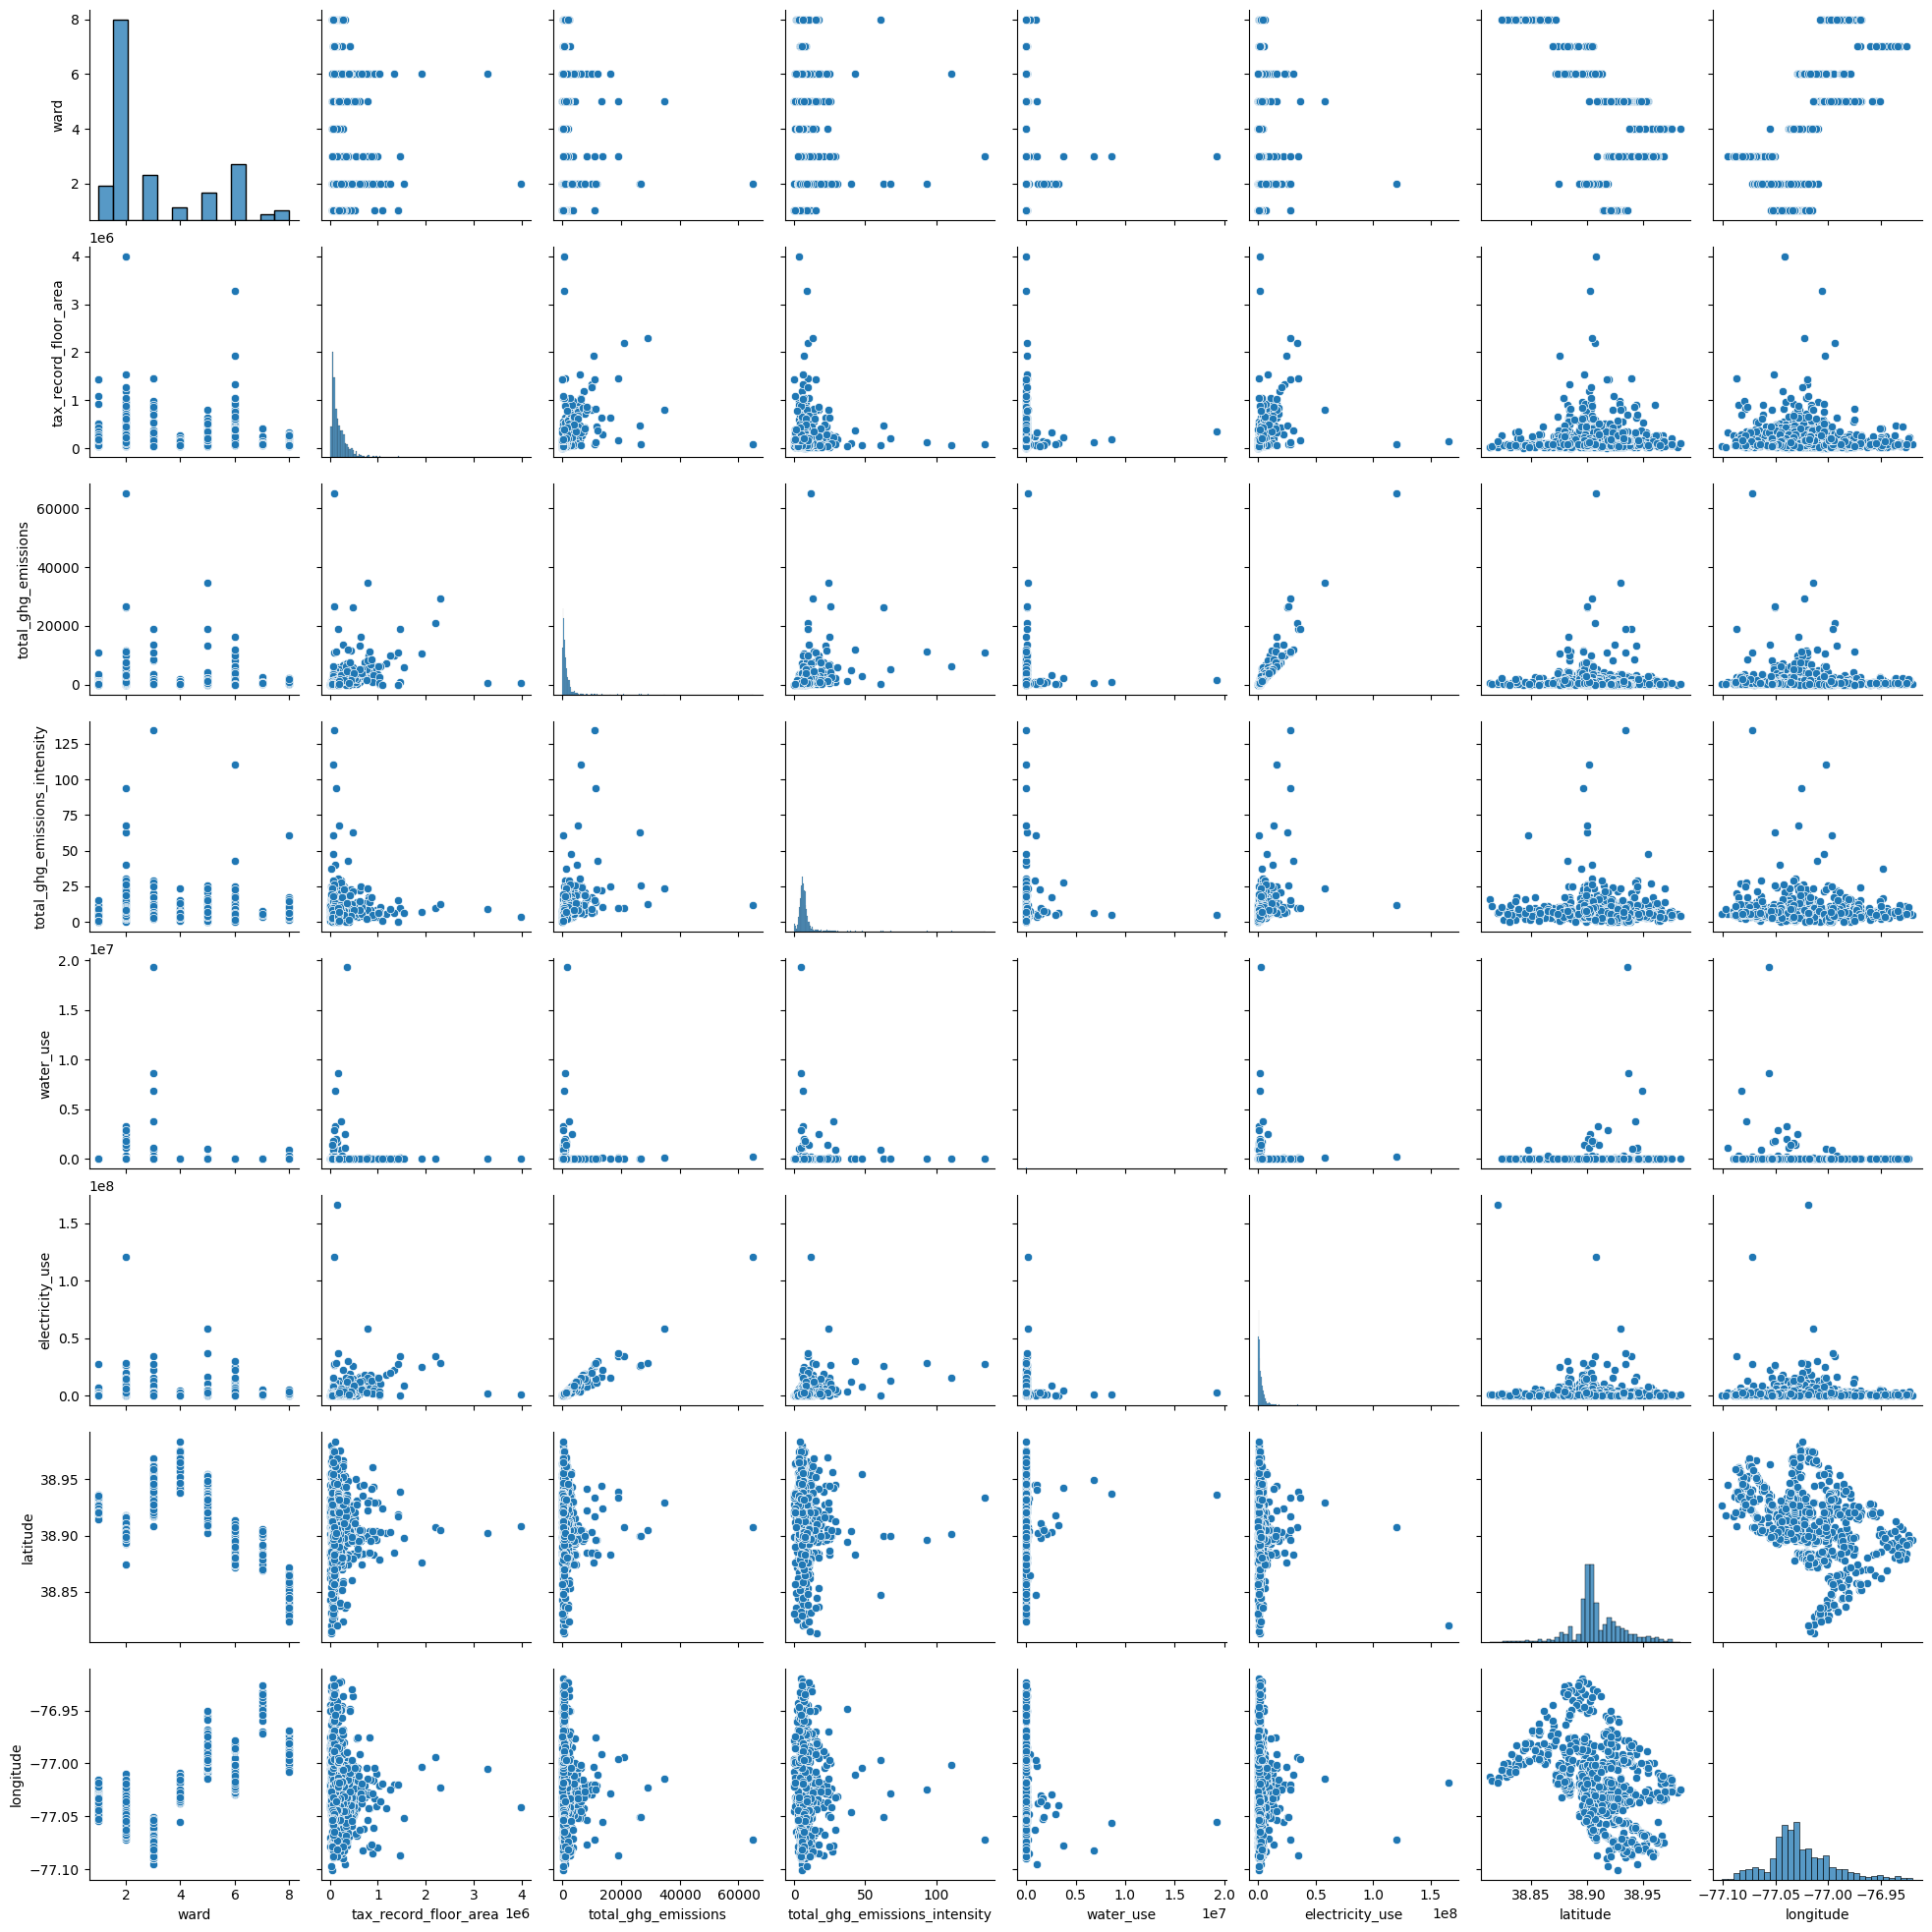

In [19]:
sns.pairplot(X_dc_numeric_data);

**Fig. 1.** This figure shows a matrix of scatterplots. Each variable from the dataset is plotted against all other variables and itself. The matrix is its own mirror image across the diagonal (a plotted against b vs. b plotted against a). The individual plots allow me to identify which variables may be correlated, e.g., show a linear positive or negative trend. For example, total_ghg_emissions vs. electricty_use show a clear positive relationship. Additionally, I suspect that electricty_use is correlated with reported_gross_floor_area and total_ghg_emissions_intensity.

In [20]:
# check correlations programmatically
corr_vals = X_dc_numeric_data.corr()
for var in corr_vals.columns:
  print(var)
  for i in range (0,len(corr_vals.loc[corr_vals[var] > abs(0.5)].index)):
    if corr_vals.loc[corr_vals[var] > 0.5].index[i] == var:
        continue
    else:
        print(corr_vals.loc[corr_vals[var] > 0.5].index[i])
        print(round(corr_vals[var][corr_vals.loc[corr_vals[var] > 0.5].index[i]],2))
  print('\n')

ward
longitude
0.63


tax_record_floor_area


total_ghg_emissions
electricity_use
0.95


total_ghg_emissions_intensity


water_use


electricity_use
total_ghg_emissions
0.95


latitude


longitude
ward
0.63




Because I don't trust myself to visually identify all variables that are correlated, I compute the correlation coefficient for all pairs and determine that a coefficient > 0.5 is high. To avoid partitioning feature importance into multiple correlated variables, I keep only one of related variables. Here, I drop ward, reported_gross_floor_area, electrcity_use, and total-ghg_emissions.

In [21]:
# remove variables with > 0.5 correlation
X_dc_numeric_data.drop(['ward', 'total_ghg_emissions','electricity_use'], axis=1, inplace=True)

In [22]:
X_dc_numeric_data.describe()

,tax_record_floor_area,total_ghg_emissions_intensity,water_use,latitude,longitude
count,1.499000e+03,1497.000000,1.290000e+03,1437.000000,1437.000000
mean,2.056808e+05,7.328056,5.667402e+04,38.908232,-77.026888
std,2.477628e+05,6.880831,6.550870e+05,0.024286,0.029941
min,9.171000e+03,0.000000,0.000000e+00,38.813539,-77.100527
25%,7.129800e+04,4.800000,2.181475e+03,38.898725,-77.044240
50%,1.287670e+05,6.300000,4.193100e+03,38.904564,-77.031591
75%,2.583795e+05,8.000000,7.332225e+03,38.920967,-77.011669
max,3.997572e+06,134.400000,1.929391e+07,38.983573,-76.919927


In [23]:
print("there are now (rows, columns) = ", X_dc_numeric_data.shape, "in the numerical variables")

there are now (rows, columns) =  (1499, 5) in the numerical variables


**2.2.2. Convert to Log**

In [24]:
X_dc_numeric_data.columns

Index(['tax_record_floor_area', 'total_ghg_emissions_intensity', 'water_use',
       'latitude', 'longitude'],
      dtype='object')

In [25]:
dc["tax_record_floor_area"] = np.log10(dc['tax_record_floor_area'])

**2.2.3. Check Missing Values**

In [26]:
# infinite + missing
print("there are {} missing or infinity values in the numerical data".format(X_dc_numeric_data.isnull().sum().sum()))

there are 335 missing or infinity values in the numerical data


In [27]:
# only infinite
print("number of infinite values:", (np.isinf(X_dc_numeric_data)).sum().sum())

number of infinite values: 0


In [28]:
# infinite as nan
X_dc_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_dc_numeric_data)).sum().sum()) # should be zero

number of infinite values: 0


In [29]:
print("the numerical data contains (rows, columns) = ", X_dc_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_dc_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (1499, 5)
there are 335 missing values in the numerical data


**2.3. Exogenous Variables: Categorical**

In [30]:
# select categorical variables
X_dc_categorical_data = dc_x.select_dtypes(exclude=[np.number])

In [31]:
X_dc_categorical_data.shape

(1499, 8)

In [32]:
X_dc_categorical_data.head()

,year_ending,report_status,primary_ptype_self,primary_ptype_epa,weather_norm_site_eui,source_eui,weather_norm_source_eui,metered_areas_energy
0,12/31/2016,In Compliance,Multifamily Housing,Multifamily Housing,102.7,175.9,174.9,Whole Building
1,12/31/2016,In Compliance,Office,Office,73.2,229.8,229.8,Whole Building
2,12/31/2016,In Compliance,Office,Office,89,215.6,215,Whole Building
3,12/31/2016,In Compliance,Office,Office,46.4,147.7,145.8,Whole Building
4,12/31/2016,In Compliance,Office,Office,65.7,206.3,206.3,Whole Building


# **3. Impute Missing Data**

**3.1. Impute Numerical Values**

In [33]:
imputer = KNNImputer(n_neighbors=3)
Xn = imputer.fit_transform(X_dc_numeric_data)
Xn = pd.DataFrame(Xn, columns = X_dc_numeric_data.columns) # convert to df

**3.2. Impute Categorical Values**

In [34]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
Xc = imputer.fit_transform(X_dc_categorical_data)
Xc = pd.DataFrame(Xc, columns =X_dc_categorical_data.columns) # convert to df

# **4. One Hot Encoding**

In [35]:
X_dc_categorical_data.describe()

,year_ending,report_status,primary_ptype_self,primary_ptype_epa,weather_norm_site_eui,source_eui,weather_norm_source_eui,metered_areas_energy
count,1499,1499,1499,1499,1437,1499,1437,1390
unique,1,2,46,46,810,1118,1104,3
top,12/31/2016,In Compliance,Office,Office,65.5,155.1,135.9,Whole Building
freq,1499,1432,502,494,9,7,5,1368


In [36]:
ohe = OneHotEncoder(sparse_output=False)
Xc = ohe.fit_transform(Xc)
Xc.shape

(1499, 3130)

In [37]:
# get names of variables
names = list(ohe.get_feature_names_out())

In [38]:
Xc = pd.DataFrame(Xc, columns =names) # convert to df

# **5. Split Into Training and Test**

In [39]:
Xn.shape

(1499, 5)

In [40]:
Xc.shape

(1499, 3130)

In [41]:
X = pd.concat([Xn, Xc],axis =1, ignore_index = False)

In [42]:
X.shape

(1499, 3135)

In [43]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 3135 features (!!!)


In [44]:
# split training vs. test
X_train, X_test, y_train, y_test = train_test_split(X, dc_y["total_energy"], test_size=0.2, random_state=17)

# **6. Random Forest Regression Model**

**6.1. Model**

In [45]:
# make model
rf = RandomForestRegressor(n_estimators=50, random_state=17,min_samples_leaf =5, max_depth=5)

In [46]:
# fit to training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=17)

In [47]:
# accuracy on test data
print ("the model test accuracy is {:.2}".format(abs(rf.score(X_test, y_test))))

the model test accuracy is 0.76


In [48]:
print ("the model train accuracy is {:.2}".format(abs(rf.score(X_train, y_train))))

the model train accuracy is 0.87


This model achieves an R2 score of 0.84. I think this is pretty good. Importantly, there is no huge accuracy drop from the training to the test set, which means that the model did not overfit. I tested different values for the hyperparameters and found that the restricting the depth of the trees to 5 and setting the minimum of samples per leaf to 5 gave me the best results. Making different decisions regarding which variables should be dropped and how to handle missing data could likely improve the model further.

**6.2. Feature Importance**

In [49]:
rf.feature_importances_[:10]

array([4.99550972e-01, 4.50861883e-01, 4.46758531e-02, 1.98781986e-03,
       1.89684521e-03, 0.00000000e+00, 0.00000000e+00, 4.31563188e-04,
       0.00000000e+00, 0.00000000e+00])

In [50]:
feature_names = X.columns
len(feature_names)

3135

**6.3. Plot**

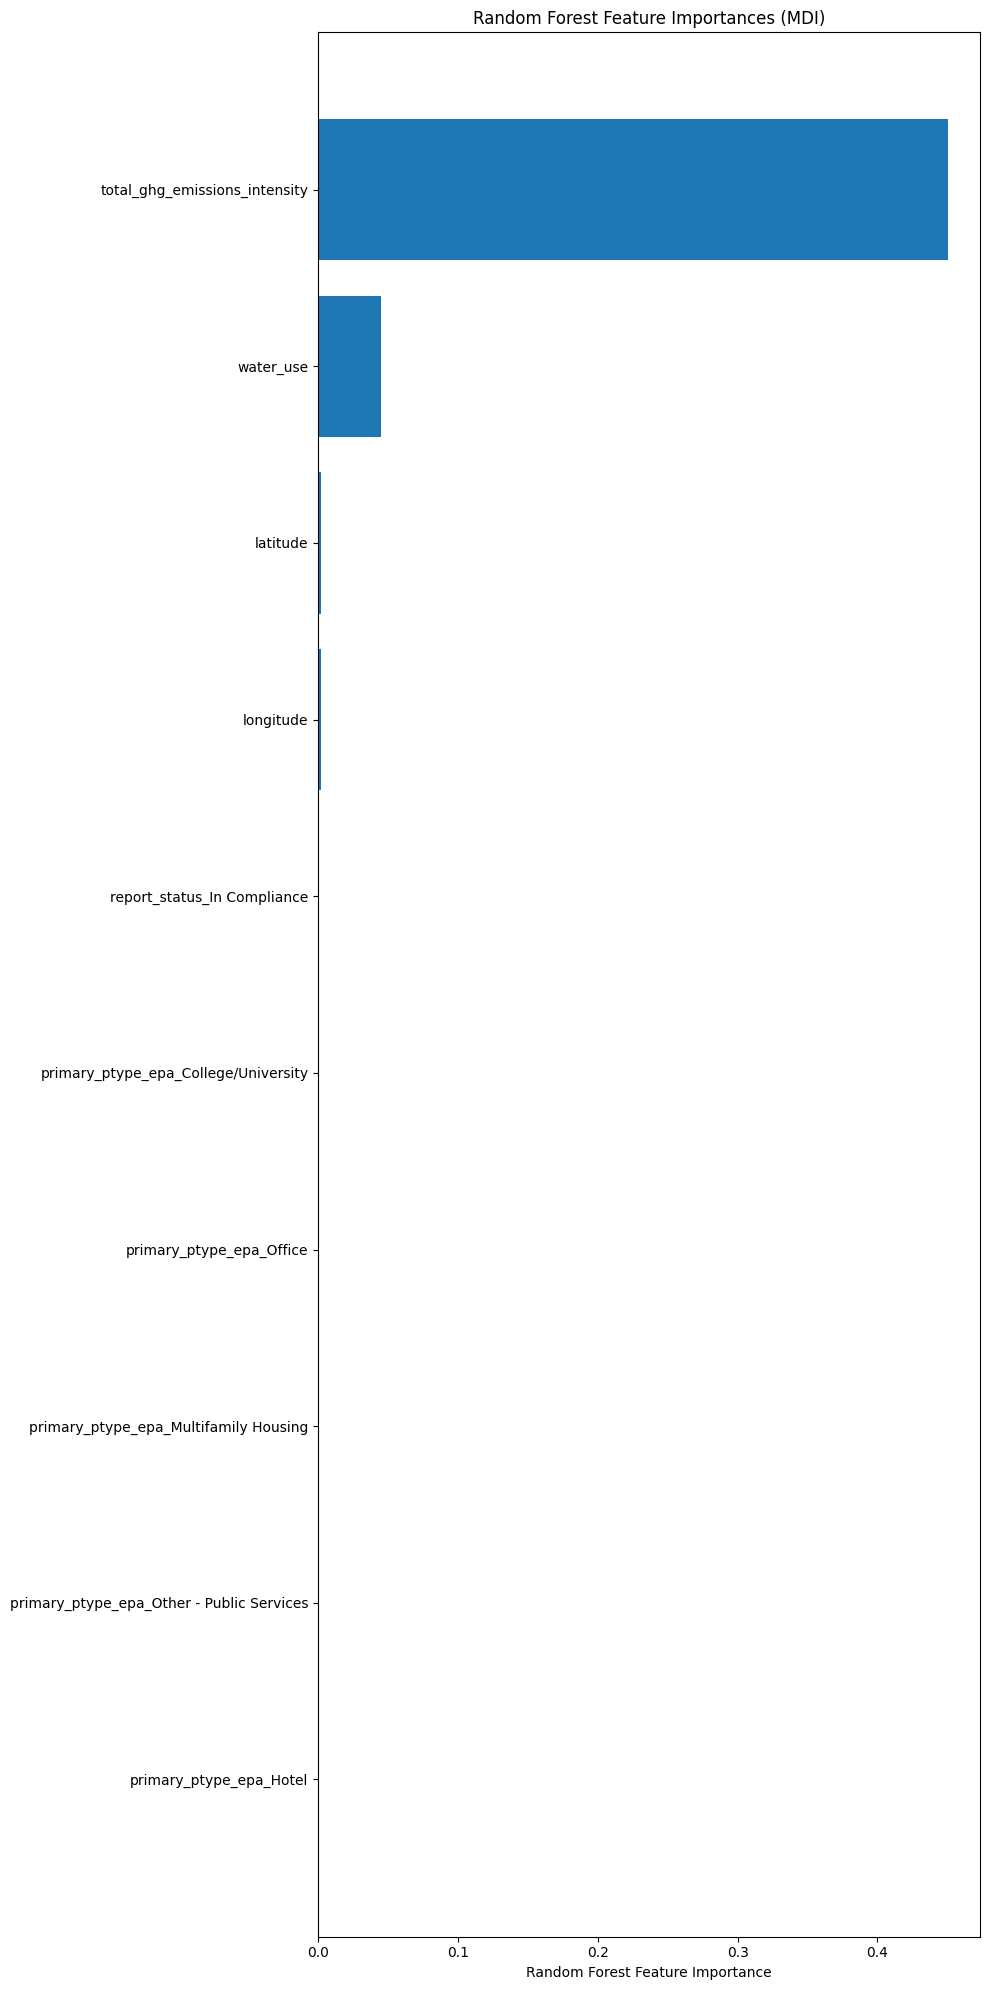

In [51]:
# plot top 5 most important features
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(10,20))
plt.barh(X.columns[-11:-1], rf.feature_importances_[sorted_idx][-11:-1])
plt.xlabel("Random Forest Feature Importance");
ax.set_yticklabels(feature_names[sorted_idx][-11:-1])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

**Fig.2.** This figure shows a barplot of the importance of each feature in buidling the random forest model. Only the top 10 most important features are plotted here for better visibility. Due to the large number of variables (as a result of one-hot-encoding), the importance of individual categorical variables is fairly small. The predictors of total electricity consumption that stick out the the most are total_ghg_emission_intensity, water_use, longitude, latitude, and building type. However, latitude and longitude are likely highly correlated with reported_gross_floor_area, which was used to calculate the target variable. Similarly, total_ghg_emission_intensity may be correlated with site_eui. As in the paper, water use and building type (office) seem to be important!

# **7. Binary Energy Variable**

In [52]:
dc_y = [float(item) for item in dc_y['total_energy']] # convert list items to float

In [53]:
# define median as threshold
threshold = statistics.median(dc_y)
dc_y_2 = []

for i in range(0,len(dc_y)):
  if dc_y[i] < threshold:
      dc_y_2.append(0)
  else:
      dc_y_2.append(1)

In [54]:
# split training-test
X_train, X_test, y_train, y_test = train_test_split(X, dc_y_2, test_size=0.2, random_state=17)

# make model
clf = RandomForestClassifier(n_estimators=50, random_state=17, min_samples_leaf = 5, max_depth = 5)

# fit the model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                       random_state=17)

In [55]:
# model performance
print ("the model test accuracy is {:.2}".format(abs(clf.score(X_test, y_test))))
print ("the model train accuracy is {:.2}".format(abs(clf.score(X_train, y_train))))

the model test accuracy is 0.85
the model train accuracy is 0.87


The random forest classification model performs similarly well as the regression model with an accuracy of 0.85 on the test set. The difference between test and training accuracy is slightly smaller here indicating generalizability of the model.

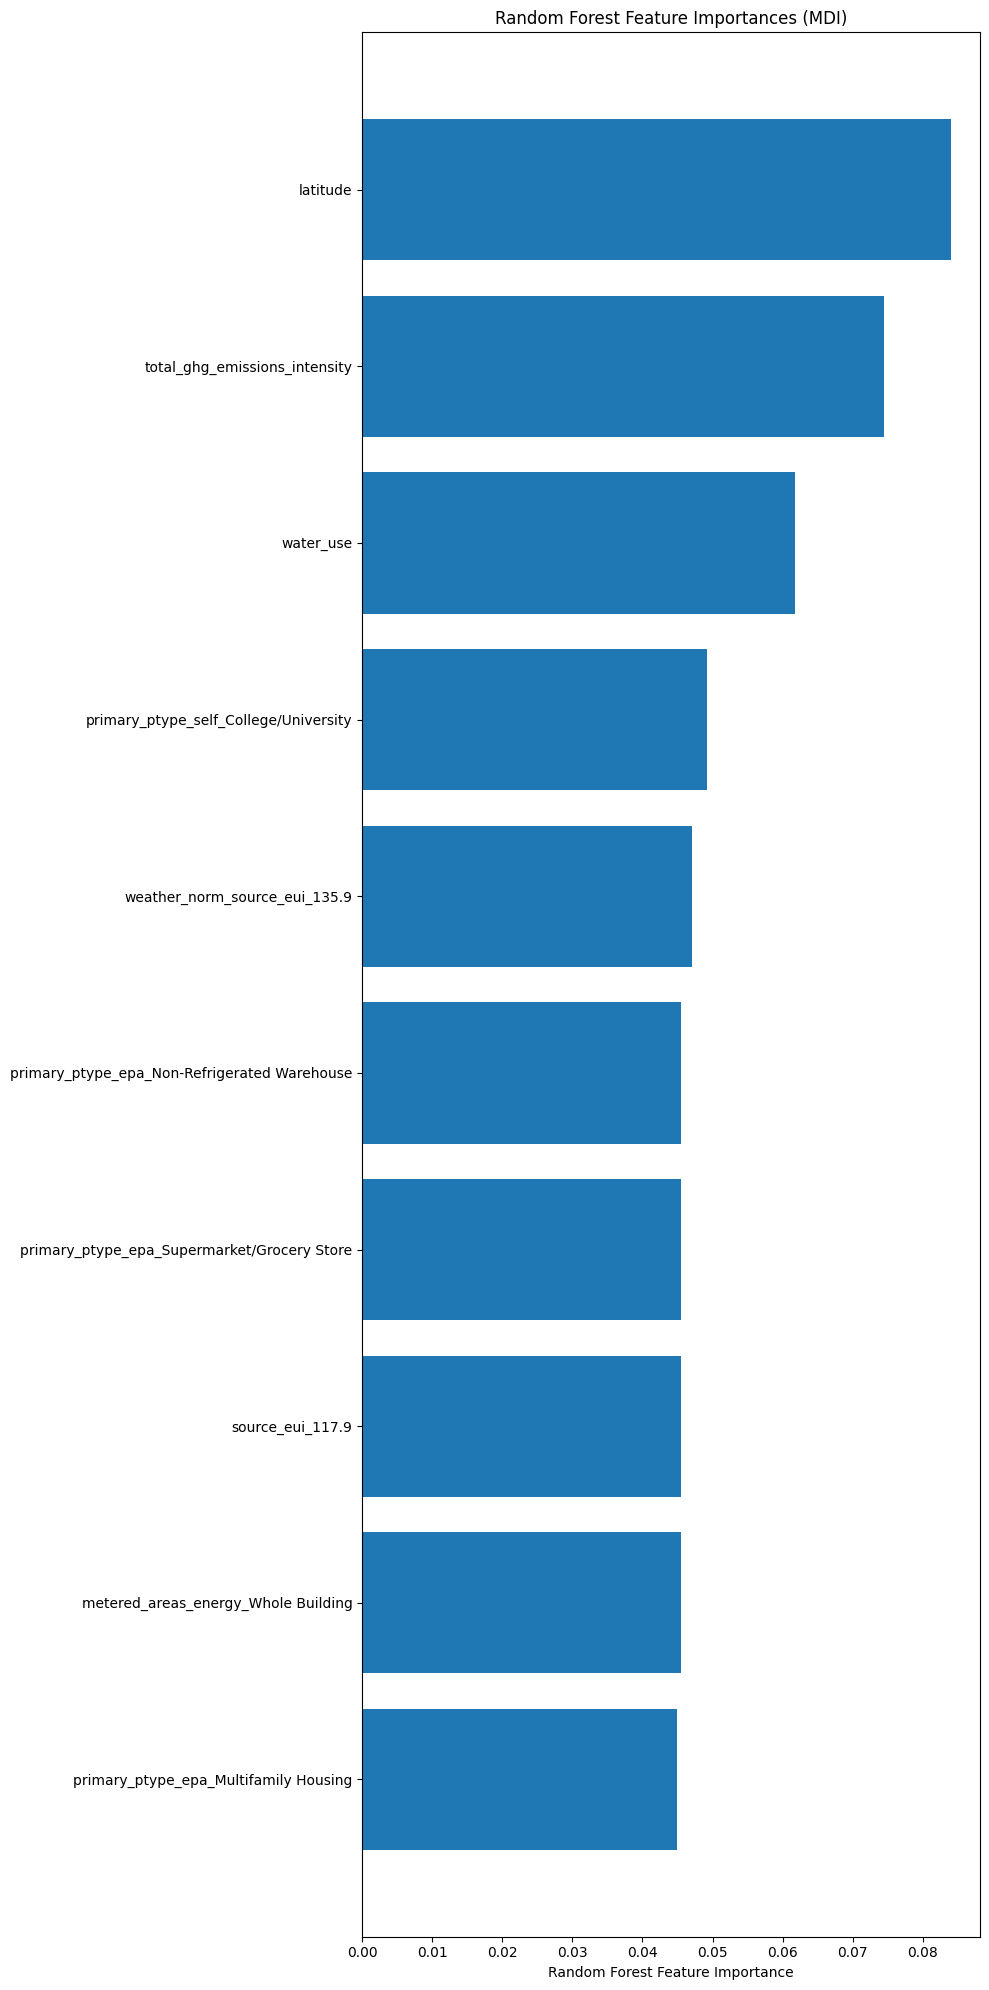

In [56]:
# feature importance
sorted_idx = clf.feature_importances_.argsort()
feature_names = X.columns

fig, ax = plt.subplots(figsize=(10,20))
plt.barh(X.columns[sorted_idx][-11:-1], clf.feature_importances_[sorted_idx][-11:-1])
plt.xlabel("Random Forest Feature Importance");
ax.set_yticklabels(feature_names[sorted_idx][-11:-1])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

**Fig.3**. This figure shows a barplot of the importance of each feature in building the random forest classier model. Only the top 10 most important features are plotted here for better visibility. Due to the large number of variables (as a result of one-hot-encoding), the importance of individual categorical variables is fairly small. The predictors of the binary total electricity consumption variable that stick out the the most are latitude, ghg_emissions_intensity, water_use, and the type of building. Latitude (and possibily ghg_emissions_intensity) is likely correlated with the target variable. Water use and the type of buiding were also found to be important in the paper. Whether or not the building is conditioned was also important in this model (non-refrigerated warehouse). Feature importance is more evenely distributed across variables compared to the regression model, which is dominated by ghg_emissions intensity.

# **City 2: Chicago**

**Read the data and inspect the dataframe:**

In [57]:
chicago = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/Chicago/Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017.csv")

In [58]:
print("there are (rows, columns) = ", (chicago.shape), "in the Chicago dataframe")

there are (rows, columns) =  (2717, 25) in the Chicago dataframe


In [59]:
chicago.describe()

,Data Year,ID,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
count,2717.0,2717.000000,2.717000e+03,2712.000000,2717.000000,2300.000000,2.691000e+03,2.478000e+03,6.700000e+01,8.800000e+01,1.700000e+01,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2717.000000,2717.000000
mean,2016.0,184277.504233,2.444146e+05,1962.731932,1.408907,60.012609,1.081069e+07,1.191014e+07,2.797624e+07,1.759946e+07,1.100594e+06,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,41.885083,-87.653376
std,0.0,59795.814503,3.956004e+05,36.324819,5.181418,28.350327,2.502301e+07,2.785050e+07,5.054843e+07,1.955778e+07,2.637424e+06,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,0.068259,0.047320
min,2016.0,100001.000000,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,-1.714850e+07,-1.383204e+06,1.587000e+04,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,41.651404,-87.905562
25%,2016.0,120518.000000,7.491000e+04,1927.750000,1.000000,38.000000,1.948236e+06,3.213429e+06,6.435511e+06,4.815333e+06,4.416000e+04,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,41.860795,-87.666607
50%,2016.0,173702.000000,1.229450e+05,1969.000000,1.000000,65.000000,4.035714e+06,5.585163e+06,1.343250e+07,9.720848e+06,7.009020e+04,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,41.890528,-87.640861
75%,2016.0,251346.000000,2.520760e+05,1997.000000,1.000000,84.000000,9.735142e+06,1.191968e+07,2.439484e+07,2.255981e+07,1.047696e+05,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,41.925024,-87.626668
max,2016.0,260184.000000,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,3.575457e+08,9.075356e+07,8.912998e+06,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.527913


# **1. Clean the data:**

In [60]:
# drop columns with > 40% missing data
for c in chicago.columns:

  # count number of rows with missing values
  n_miss = chicago[c].isnull().sum()
  perc = n_miss / chicago.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chicago[c].dtype,
                                                  n_miss, perc))
  if perc > 40:
    chicago.drop(c, axis=1, inplace=True)

print("\n\nthere are (rows, columns) = ", (chicago.shape), "in the chicago dataframe")

Data Year (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
Property Name (object):  Missing: 0 (0.0%)
Address (object):  Missing: 0 (0.0%)
ZIP Code (object):  Missing: 0 (0.0%)
Community Area (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (float64):  Missing: 0 (0.0%)
Year Built (float64):  Missing: 5 (0.2%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 417 (15.3%)
Electricity Use (kBtu) (float64):  Missing: 26 (1.0%)
Natural Gas Use (kBtu) (float64):  Missing: 239 (8.8%)
District Steam Use (kBtu) (float64):  Missing: 2650 (97.5%)
District Chilled Water Use (kBtu) (float64):  Missing: 2629 (96.8%)
All Other Fuel Use (kBtu) (float64):  Missing: 2700 (99.4%)
Site EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Source EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Weather Normalized Source EUI (kBtu/sq 

In [61]:
# remove irrelevant variables
print("Original:")
print(chicago.columns)   # examine variable names
print(chicago.shape)
chicago.drop(["ID","Property Name","Address","ZIP Code","# of Buildings","Year Built", "Data Year","Location"], axis=1, inplace=True)
print("\n\nNew:")
print(chicago.columns)   # examine variable names
print(chicago.shape)

Original:
Index(['Data Year', 'ID', 'Property Name', 'Address', 'ZIP Code',
       'Community Area', 'Primary Property Type',
       'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings',
       'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)',
       'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location'],
      dtype='object')
(2717, 22)


New:
Index(['Community Area', 'Primary Property Type',
       'Gross Floor Area - Buildings (sq ft)', 'ENERGY STAR Score',
       'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)',
       'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e

#**2. Transform Input Features**

In [62]:
chicago.describe()

,Gross Floor Area - Buildings (sq ft),ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
count,2.717000e+03,2300.000000,2.691000e+03,2.478000e+03,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2717.000000,2717.000000
mean,2.444146e+05,60.012609,1.081069e+07,1.191014e+07,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,41.885083,-87.653376
std,3.956004e+05,28.350327,2.502301e+07,2.785050e+07,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,0.068259,0.047320
min,5.000000e+04,1.000000,5.028900e+03,1.284000e+03,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,41.651404,-87.905562
25%,7.491000e+04,38.000000,1.948236e+06,3.213429e+06,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,41.860795,-87.666607
50%,1.229450e+05,65.000000,4.035714e+06,5.585163e+06,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,41.890528,-87.640861
75%,2.520760e+05,84.000000,9.735142e+06,1.191968e+07,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,41.925024,-87.626668
max,9.245333e+06,100.000000,4.857050e+08,5.493302e+08,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.527913


The statistics overview suggests that all EUI and GHG related variables have large positive outliers skewing the symmetry of the distribution.

In [63]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Community Area                              2717 non-null   object 
 1   Primary Property Type                       2717 non-null   object 
 2   Gross Floor Area - Buildings (sq ft)        2717 non-null   float64
 3   ENERGY STAR Score                           2300 non-null   float64
 4   Electricity Use (kBtu)                      2691 non-null   float64
 5   Natural Gas Use (kBtu)                      2478 non-null   float64
 6   Site EUI (kBtu/sq ft)                       2688 non-null   float64
 7   Source EUI (kBtu/sq ft)                     2688 non-null   float64
 8   Weather Normalized Site EUI (kBtu/sq ft)    2658 non-null   float64
 9   Weather Normalized Source EUI (kBtu/sq ft)  2658 non-null   float64
 10  Total GHG Em

Looks like none of the remaining variables has a parrticularly large proportion of missing data. Energy STAR has the lowest number of values, possibly indicating that this measure is not reliably collected.

**2.1. Endogenous Variable**

In [64]:
# remove rows with missing site EUI (Energy Use Intensity)
original_len = chicago.shape[0]
chicago.dropna(subset=['Site EUI (kBtu/sq ft)'], inplace=True)
chicago.dropna(subset=['Gross Floor Area - Buildings (sq ft)'], inplace=True)
print("I lost {:.2f}% of the data".format((1 - (chicago.shape[0] / original_len)) * 100))

I lost 1.07% of the data


In [65]:
# check
chicago["Site EUI (kBtu/sq ft)"].isna().sum()

0

In [66]:
# compute total building energy use and convert to log space
chicago["total_energy"] = np.log10(chicago['Site EUI (kBtu/sq ft)'] * chicago['Gross Floor Area - Buildings (sq ft)'])

In [67]:
# drop infinite
chicago["total_energy"].replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(chicago["total_energy"])).sum().sum()) # should be zero
chicago.dropna(subset=["total_energy"], how="all", inplace=True)

number of infinite values: 0


In [68]:
# separate X and Y (Site EUI (kBtu/sq ft))
chicago_y = pd.DataFrame(chicago['total_energy'].values)
chicago_x = chicago.drop(['total_energy','Site EUI (kBtu/sq ft)','Gross Floor Area - Buildings (sq ft)'], axis =1)

**2.2. Exogenous Variables: Numerical**

In [69]:
# select numerical variables
X_chicago_numeric_data = chicago_x.select_dtypes(include=[np.number])

In [70]:
X_chicago_numeric_data.shape

(2688, 10)

In [71]:
X_chicago_numeric_data.head()

,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,96.0,1935003.2,2783435.5,90.9,46.7,87.8,504.5,5.1,41.884253,-87.63245
1,55.0,2477744.2,3147551.1,120.4,63.6,123.0,623.9,6.8,41.947402,-87.64964
2,24.0,5724360.2,1951759.8,147.2,59.8,157.4,1158.8,8.5,41.899208,-87.62729
3,41.0,3158535.8,17010259.2,152.4,121.1,163.3,1485.7,8.2,41.845860,-87.62921
4,94.0,3620381.1,5465540.1,88.4,48.8,89.0,957.6,4.9,41.874295,-87.65018


Nothing looks suspicious.

**2.2.1. Collinearity**

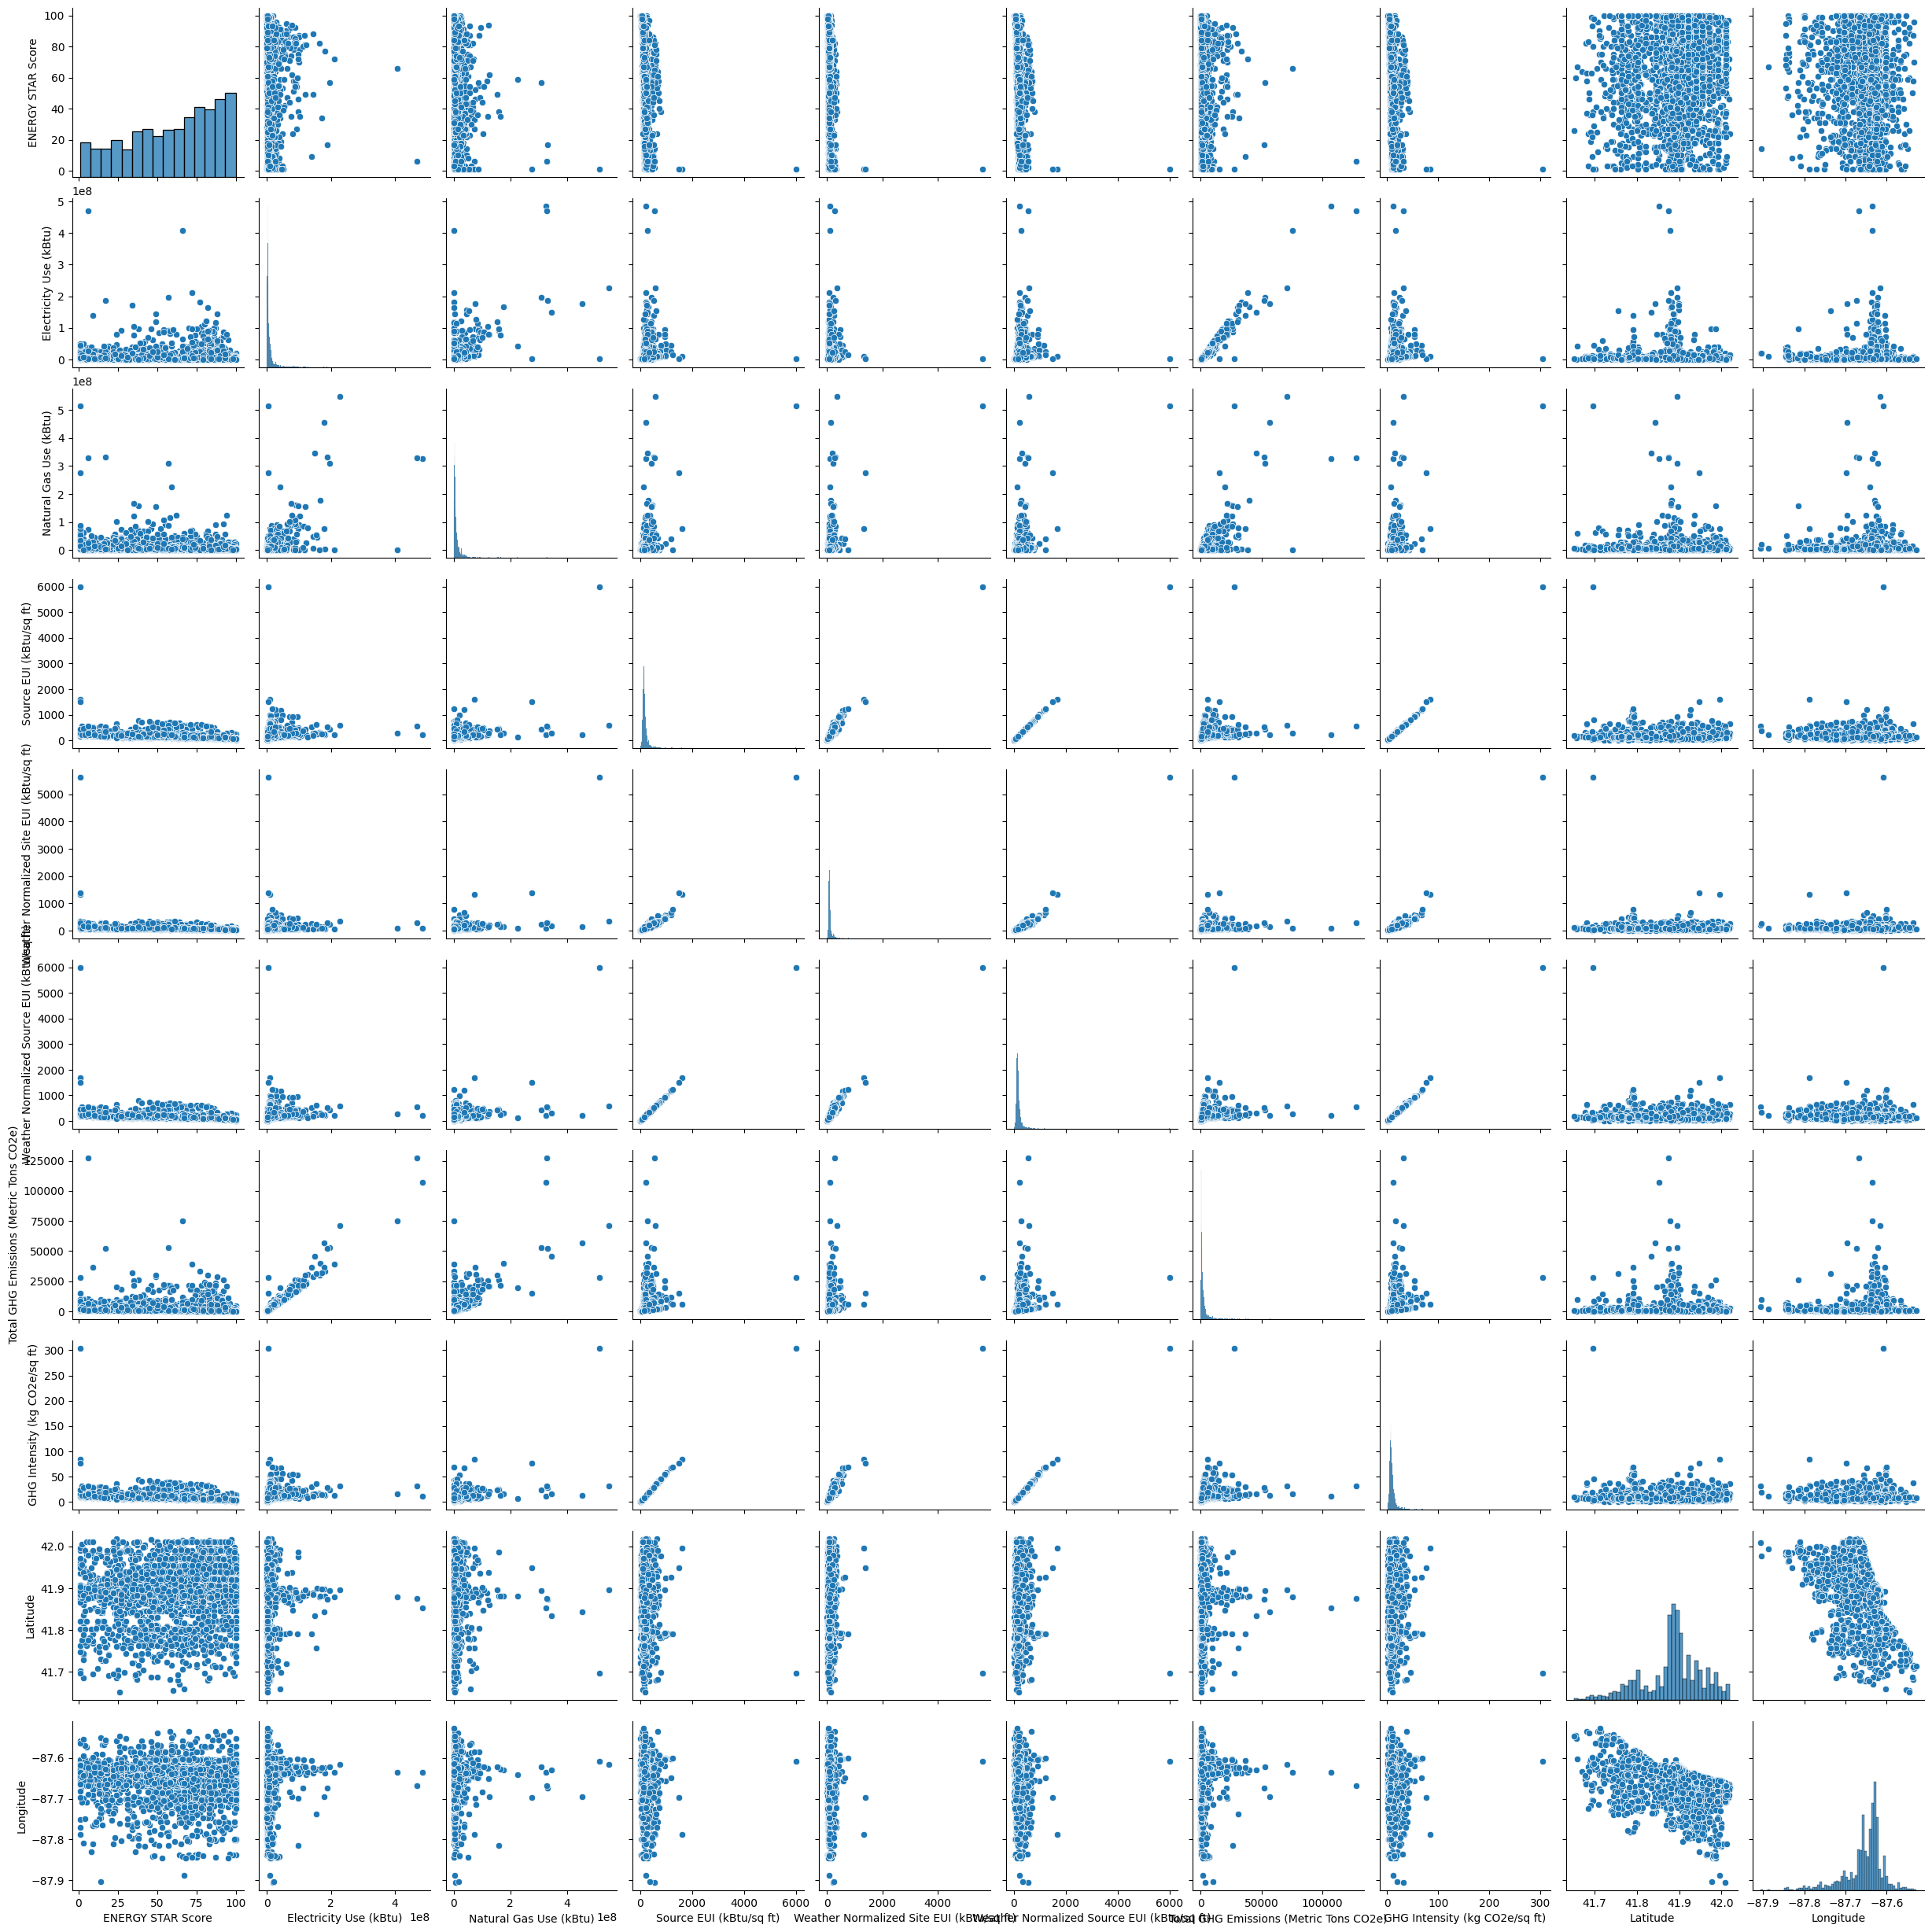

In [72]:
sns.pairplot(X_chicago_numeric_data);

**Fig. 4.** This figure shows a matrix of scatterplots. Each variable from the dataset is plotted against all other variables and itself. The matrix is its own mirror image across the diagonal (a plotted against b vs. b plotted against a). The individual plots allow me to identify which variables may be correlated, e.g., show a linear positive or negative trend. For example, total_ghg_emissions vs. electricty_use show a clear positive relationship. Additionally, I suspect that ghg_emissions_intensity is correlated with the weather_normalized_source_eui, weather_normalized_site_eui, and source_eui.



In [ ]:
# check correlations programmatically
corr_vals = X_chicago_numeric_data.corr()
for var in corr_vals.columns:
  print(var)
  for i in range (0,len(corr_vals.loc[corr_vals[var] > abs(0.5)].index)):
    if corr_vals.loc[corr_vals[var] > 0.5].index[i] == var:
        continue
    else:
        print(corr_vals.loc[corr_vals[var] > 0.5].index[i])
        print(round(corr_vals[var][corr_vals.loc[corr_vals[var] > 0.5].index[i]],2))
  print('\n')

In [ ]:
X_chicago_numeric_data.drop(['Electricity Use (kBtu)','Natural Gas Use (kBtu)','Total GHG Emissions (Metric Tons CO2e)','Weather Normalized Site EUI (kBtu/sq ft)','Weather Normalized Source EUI (kBtu/sq ft)','GHG Intensity (kg CO2e/sq ft)'], axis=1, inplace=True)

In [ ]:
X_chicago_numeric_data.describe()

In [ ]:
print("there are now (rows, columns) = ", X_chicago_numeric_data.shape, "in the numerical variables")

**2.2.2. Convert to Log**

In [ ]:
X_chicago_numeric_data.columns

In [ ]:
# no variables to transform
##chicago["tax_record_floor_area"] = np.log10(chicago['tax_record_floor_area'])

**2.2.3. Check Missing Values**

In [ ]:
# infinite + missing
print("there are {} missing or infinity values in the numerical data".format(X_chicago_numeric_data.isnull().sum().sum()))

In [ ]:
# only infinite
print("number of infinite values:", (np.isinf(X_chicago_numeric_data)).sum().sum())

In [ ]:
# drop infinite
X_chicago_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_chicago_numeric_data)).sum().sum()) # should be zero

In [ ]:
# infinite + missing (but effectively only missing)
print("the numerical data contains (rows, columns) = ", X_chicago_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_chicago_numeric_data.isnull().sum().sum()))

**2.3. Exogenous Variables: Categorical**

In [ ]:
# select categorical variables
X_chicago_categorical_data = chicago_x.select_dtypes(exclude=[np.number])

In [ ]:
X_chicago_categorical_data.shape

In [ ]:
X_chicago_categorical_data.head()

# **3. Impute Missing Data**

**3.1. Impute Numerical Values**

In [ ]:
imputer = KNNImputer(n_neighbors=3)
Xn = imputer.fit_transform(X_chicago_numeric_data)
Xn = pd.DataFrame(Xn, columns = X_chicago_numeric_data.columns) # convert to df

**3.2. Impute Categorical Values**

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
Xc = imputer.fit_transform(X_chicago_categorical_data)
Xc = pd.DataFrame(Xc, columns =X_chicago_categorical_data.columns) # convert to df

# **4. One Hot Encoding**

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
Xc = ohe.fit_transform(Xc)
Xc.shape

In [ ]:
# get names of variables
names = list(ohe.get_feature_names_out())

In [90]:
Xc = pd.DataFrame(Xc, columns =names) # convert to df

# **5. Split Into Training and Test**

In [91]:
Xn.shape

(2688, 4)

In [92]:
Xc.shape

(2688, 163)

In [93]:
X = pd.concat([Xn, Xc],axis =1, ignore_index = False)
X.shape

(2688, 167)

In [94]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 167 features (!!!)


In [95]:
# split training vs. test
X_train, X_test, y_train, y_test = train_test_split(X, chicago_y, test_size=0.3, random_state=17)

# **6. Random Forest Regression Model**

**6.1. Model**

In [96]:
# make model
rf = RandomForestRegressor(n_estimators=50, random_state=17,min_samples_leaf =2, max_depth=10)

In [97]:
# fit to training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=50,
                      random_state=17)

In [98]:
# accuracy on test data
print ("the model test accuracy is {:.2}".format(abs(rf.score(X_test, y_test))))

the model test accuracy is 0.57


In [99]:
print ("the model train accuracy is {:.2}".format(abs(rf.score(X_train, y_train))))

the model train accuracy is 0.77


This model achieves an R2 score of 0.57. This is not that great. Also, the accuracy for the training test is much higher indicating overfitting. Restricting the tree depth reduces R2 for training but doesn't change R2 for the test set. My guess is that too many variables have been removed from the dataset.

**6.2. Feature Importance**

In [100]:
rf.feature_importances_[:10]

array([7.27184432e-02, 4.40616824e-01, 1.36866394e-01, 2.00297862e-01,
       0.00000000e+00, 1.19706950e-05, 8.50147195e-04, 4.59297746e-05,
       8.29284836e-06, 1.89706410e-05])

In [101]:
feature_names = X.columns
len(feature_names)

167

**6.3. Plot**

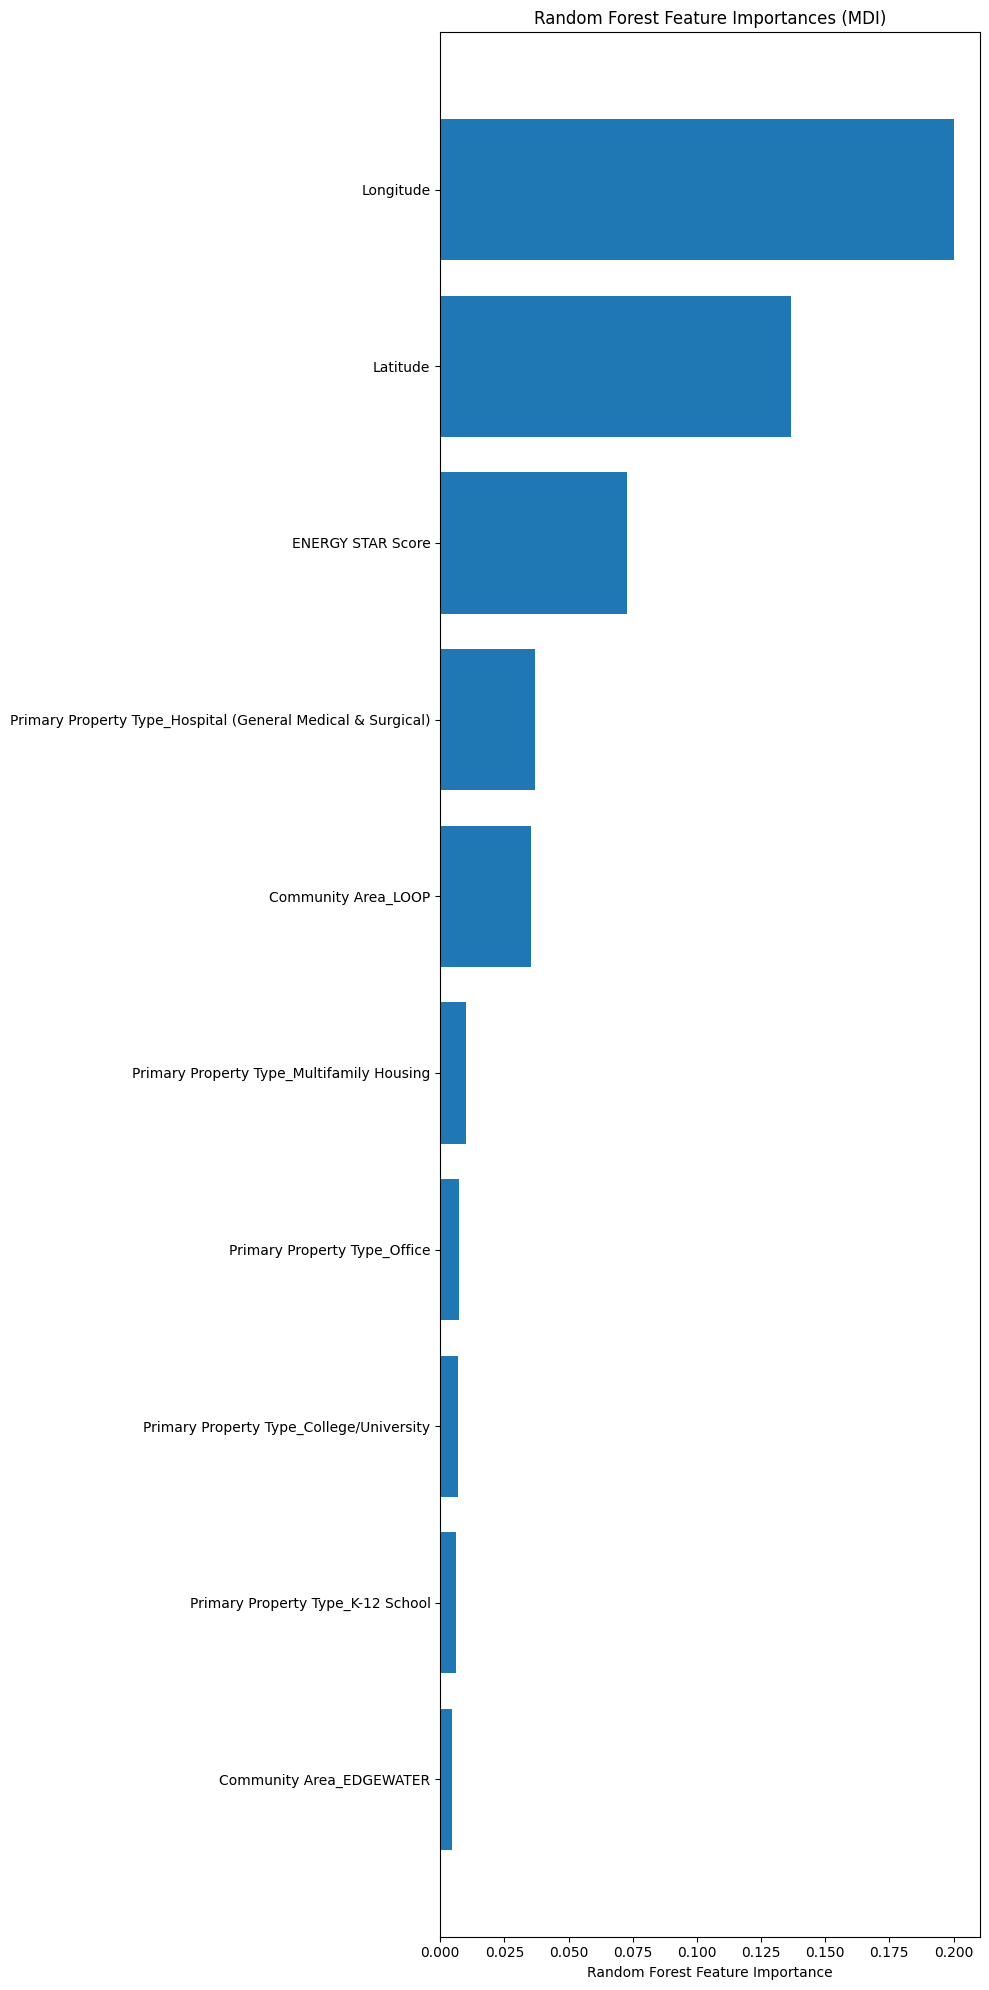

In [102]:
# plot top 5 most important features
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(10,20))
plt.barh(X.columns[-11:-1], rf.feature_importances_[sorted_idx][-11:-1])
plt.xlabel("Random Forest Feature Importance");
ax.set_yticklabels(feature_names[sorted_idx][-11:-1])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

**Fig.5.** This figure shows a barplot of the importance of each feature in buidling the random forest model. Only the top 10 most important features are plotted here for better visibility. The predictors of total electricity consumption that stick out the the most are longitude and latitude, followed by the Energy STAR score and various types of buildings. Again, latitude and longitude are likely highly correlated with reported_gross_floor_area, which was used to calculate the target variable. As in the paper, water use and building type (or its type of use) seem to be important!

# **7. Binary Energy Variable**

In [103]:
chicago_y = [float(item) for item in chicago_y[0]] # convert list items to float

In [104]:
# define median as threshold
threshold = statistics.median(chicago_y)
chicago_y_2 = []

for i in range(0,len(chicago_y)):
  if chicago_y[i] < threshold:
      chicago_y_2.append(0)
  else:
      chicago_y_2.append(1)

In [105]:
# split training-test
X_train, X_test, y_train, y_test = train_test_split(X, chicago_y_2, test_size=0.2, random_state=17)

# make model
clf = RandomForestClassifier(n_estimators=50, random_state=17, min_samples_leaf = 3, max_depth = 5)

# fit the model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=50,
                       random_state=17)

In [ ]:
# model performance
print ("the model test accuracy is {:.2}".format(abs(clf.score(X_test, y_test))))
print ("the model training accuracy is {:.2}".format(abs(clf.score(X_train, y_train))))

The same dataset provides much better accuracy when a classification random forest model is used! Accuracy for the test set is up to 0.74 as compared to 0.57 with the regression random forest model. The difference between accuracy for the training and the test set is also relatively low. To predict energy consumption on the chicago dataset, a classification model is prefered.

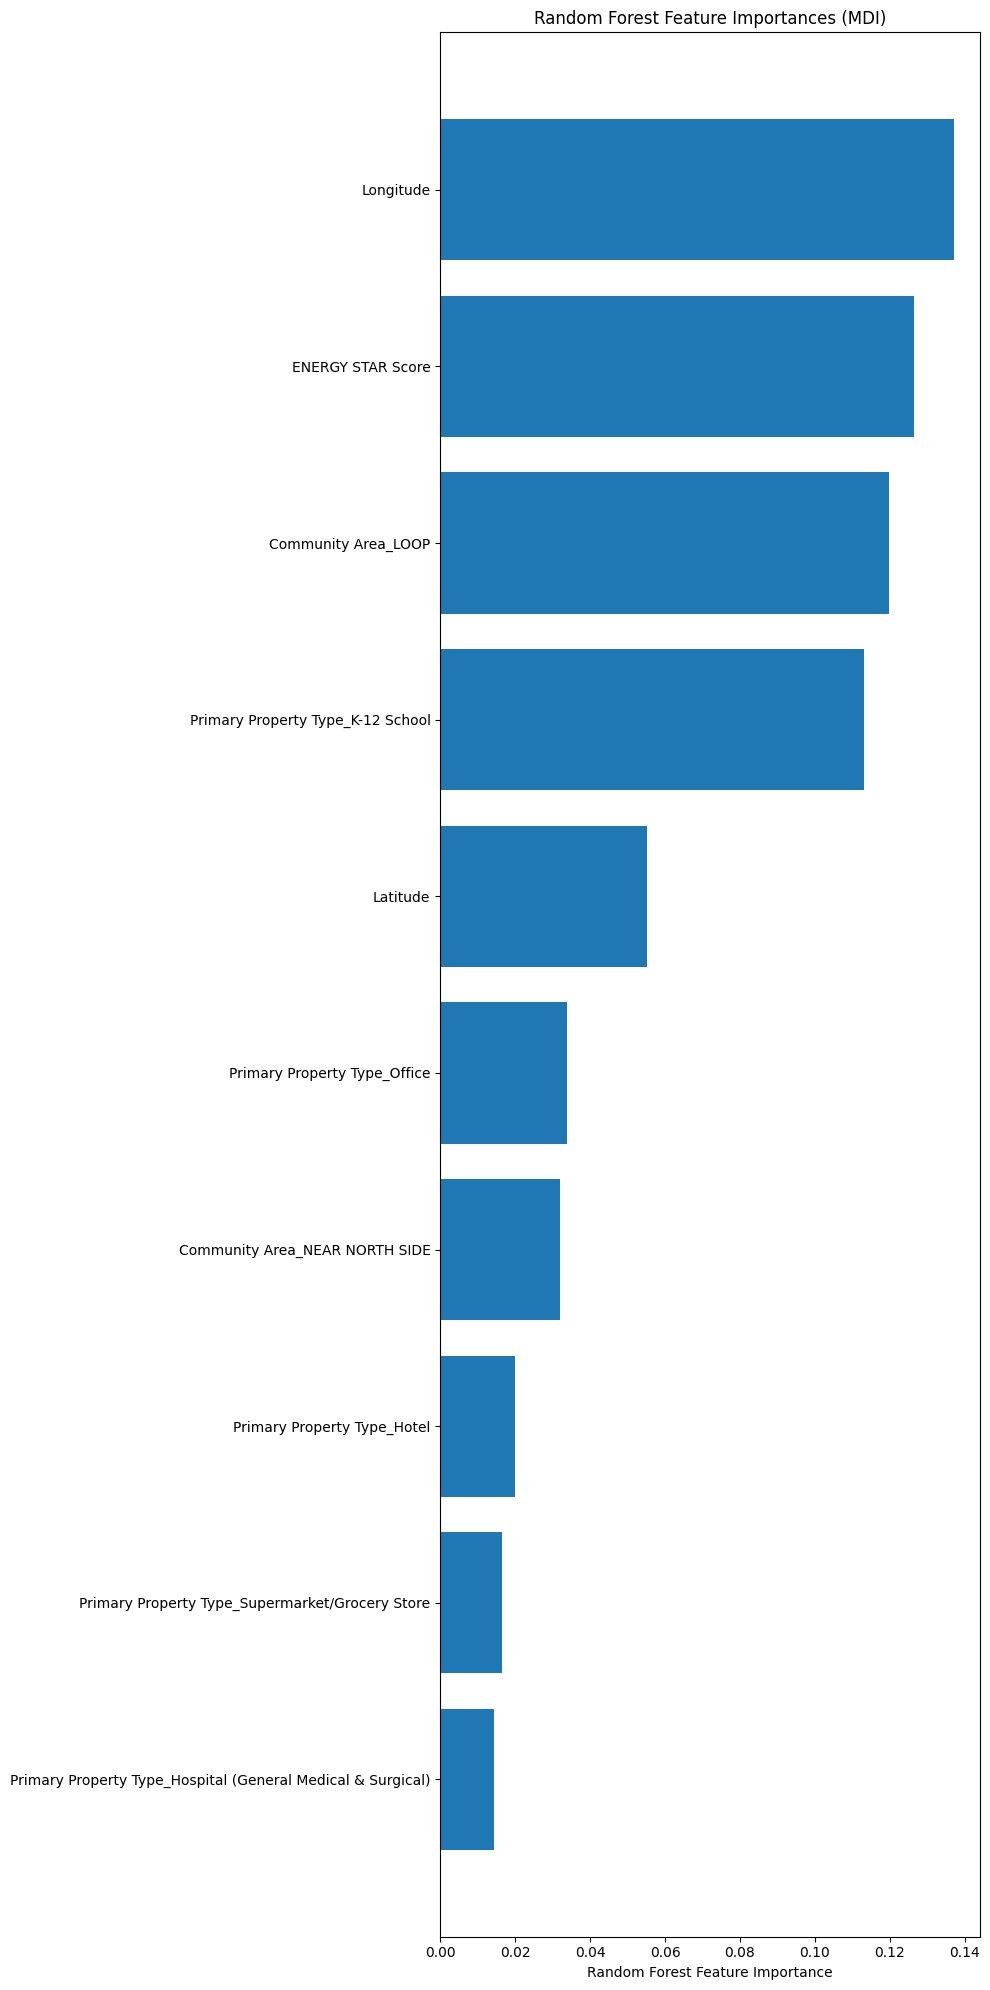

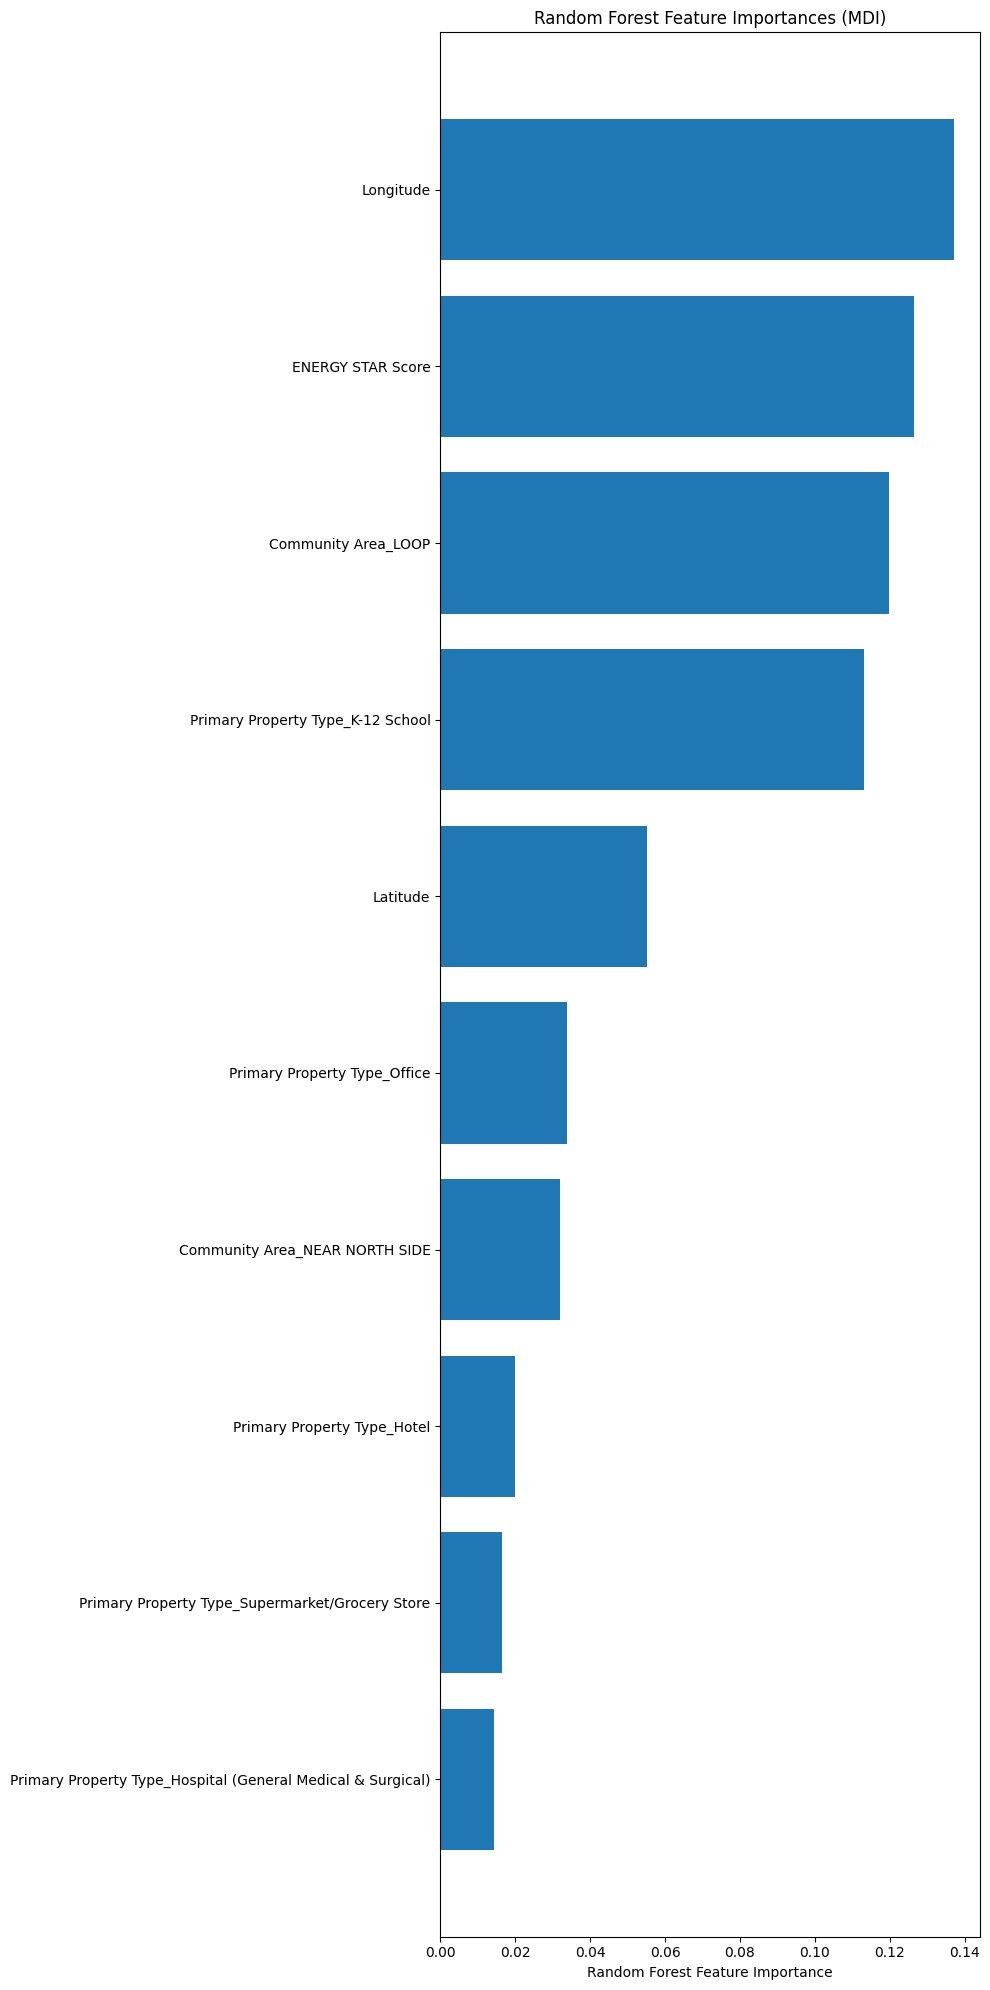

In [107]:
# feature importance
sorted_idx = clf.feature_importances_.argsort()
feature_names = X.columns

fig, ax = plt.subplots(figsize=(10,20))
plt.barh(X.columns[sorted_idx][-11:-1], clf.feature_importances_[sorted_idx][-11:-1])
plt.xlabel("Random Forest Feature Importance");
ax.set_yticklabels(feature_names[sorted_idx][-11:-1])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

**Fig.6.** This figure shows a barplot of the importance of each feature in buidling the random forest model. Only the top 10 most important features are plotted here for better visibility. The predictors of total electricity consumption that stick out the the most are longitude, Energy STAR, community area_loop, Building type (school), and latitude followed by other property types. Building type seems to be very important in this model and also Energy STAR.

**Q1**: Are the most important features in predicting total energy consumption the same in Washington D.C., Chicago, and in the paper?

Property type is an important feature for predicting total energy consumption in both cities and in the paper. The one-hot-encoding allows individual property types to appear separately in the feature importance plot. This provides more detailed information about which type of building are the most and the least energy consuming. If all types had been summarized under one variable, the property type variable would have likely dominated all other variables. The paper also finds water consumption to be highly predictive of energy consumption. This was replicated for the D.C. dataset, but not for the chicago dataset. Additionally, D.C. energy consumption was predicted by ghg_emissions, while chicago energy consumption was also predicted by the Energy STAR score. The Energy STAR score is a compound measure of energy efficiency. The current results support the usefulness of this score in predicting total energy consumption.

**Q2**: Compare the results for Washington D.C. and Chicago.

The most striking difference between the model outputs for the D.C. and chicago datasets is the difference in performance of the random forest regression model. The D.C. model shows pretty high accuracy and converting the variable to a binary variable to run a classification random forest doesn't improve the results much. However, the chicago dataset is much more able to accurately predict energy consumption when treated as a classification problem. Overall, the performance is still lower for chicago than for D.C. Making different decisions regarding which predictor variables to keep in the model may improve both models and could possibly cause the difference between the datasets to diminish.  